# Module 5 - Bayesian analysis

## Bayesian Networks

A Bayesian network (BN) is composed of random variables (nodes) and their conditional dependencies (arcs) which, together, form a directed acyclic graph (DAG). They have become a widely used method in the modelling of uncertain knowledge. A conditional probability table (CPT) is associated with each node. It contains the conditional probability distribution of the node given its parents in the DAG:

<img src='graphics/Wetgrass.png' style='width: 450px;' >

Basically, each node represents a random variable, which is decribed by a probability distribution over its parents' nodes. The biggest advantage of the Bayesian network is its compact and modular strucute. Humans do not have access to all the probability distributions and all variables of the world. For this reason, in order to make probabilisitc inferences, humans need to combine different sources of evidence in order to come up with an answer. This is precisely what Bayesin Networks do, using elaborate probabilistic formulas based on the Naive Bayes that we jsut saw. It is not relevant to go through the mathematics. Bayesian Networks are graphical structures that enable any non-expert to use them in daily decision making tasks.

## Creating a Bayesian Network in Python

Consider the Bayesian Network, which describes the following decision scenario. 

This network trys to expresss the probability of a person having wither Tuberculosis, Lung Cancer or Bronchitis, given some symptoms, Shortness in Breath (Dispnea), exames (like a positive xray result) and some historical information: visits to Asia and Smoking.


<img src='graphics/asia.png' style='width: 450px;' >

The random variables of this network are:
* Visit to Asia
* Tuberculosis
* Either Tuberculosi or Lung Cancer
* Positive X-Ray
* Dispnea
* Bronchitis
* Smoker

**QUESTION. Which of the above random variables are root notes of the Network? (A root node is a node that does not descend from any other node)**

**Answer:** 
- Visit to Asia
- Smoker


### Create the Network Structure in Python

We start by importing into Python the necessary libraries to work in this notebook

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np

#Python Library that deals with Bayesan Networks (BNs)
import pyAgrum as bn_graphs
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from pyAgrum.lib.bn2roc import showROC

import seaborn as sns
sns.set()


Next, we define our Bayesian Network. As wyou can see, it is an empty structure (for now...)

In [2]:
bn = bn_graphs.BayesNet('CancerBN') #Creates an empty network called CancerBN
print(bn)                           #Prints the created BN


BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


The above code builds a general network structure, but with no nodes or edges or conditional probability tables.
Our next step will be precisely to specify these variables.

### Create the Random Variables (the nodes)

To create a random variable, we need to use pyAgrum's function *LabelizedVariable*, which is a variable whose domain is a finite set of labels. You can do it in the following way:

In [3]:
#The function LabelizedVariable( id_name, label, cardinality), receives the follwoing arguments
#name: is a string that uniquely identifies the node
#cardinality: is an integer which specifies the amount of different values that the 
#             the random varible will have. We will set this for 0 now

id_name = 'LungCancer'
label = 'LungCancer'
LungCancer = bn_graphs.LabelizedVariable(id_name, label, 0)
print(LungCancer)

LungCancer:Labelized(<>)


We can now specify the labels "true" and "false" of our random variable. For this, we use the method *addLabel()*

In [4]:
#In our example, we have a random variable 'LungCancer' which can have the values 
LungCancer.addLabel('present')   #'present' if LungCancer occured or 

LungCancer.addLabel('absent')    #'absent' if LungCancer did not occur.
print(LungCancer)

LungCancer:Labelized(<present,absent>)


We can now add the created random variable to our network by using the method .add()

In [5]:
bn.add( LungCancer )

0

In [6]:
#Create a list with the names of the nodes
nodes_lst = ['VisitAsia','Smoker', 'Tuberculosis', 'Bronchitis', 'Dispnea', 'PositiveXray', 'TubercOrLungCan']
print(nodes_lst)


['VisitAsia', 'Smoker', 'Tuberculosis', 'Bronchitis', 'Dispnea', 'PositiveXray', 'TubercOrLungCan']


In [7]:
#Creates a new node for each of the random variables in nodes_lst

# node is a variable  that will go through each entry of the list nodes_lst
# the iterations are performed by the function *for* in the following way:
# node = 'Visit Asia' ............. iteration #1
# node = 'Smoker' ................. iteration #2
# node = 'Tuberculosis' ........... iteration #3
# node = 'Bronchitis' ............. iteration #4
# node = 'Dispnea' ................ iteration #5
# node = 'Positive Xray' .......... iteration #6
# node = 'TubercOrLungCan' ........ iteration #7
for node in nodes_lst:
    print(node)
    var = bn_graphs.LabelizedVariable(node, node, 0)  #creates random variable
    var.addLabel('present')                           #adds the label 'true'
    var.addLabel('absent')                            #adds the label 'false'
    bn.add(var)                                       #adds the created var to the network

print(bn)


VisitAsia
Smoker
Tuberculosis
Bronchitis
Dispnea
PositiveXray
TubercOrLungCan
BN{nodes: 8, arcs: 0, domainSize: 256, dim: 16}


### Create the Edges (the arcs between nodes)

Now that we have defined our nodes, we need to define the arcs between them. For this, we use the method addArc( sourceNode, targetNode ):

In [8]:
# Arc between 
bn.addArc('VisitAsia', 'Tuberculosis')
print(bn)


BN{nodes: 8, arcs: 1, domainSize: 256, dim: 18}


In [9]:
arc_lst = [ ('Tuberculosis', 'TubercOrLungCan'), ('LungCancer', 'TubercOrLungCan'), ('Smoker','LungCancer' ), ('Smoker', 'Bronchitis'), ('Bronchitis', 'Dispnea'), ('TubercOrLungCan', 'Dispnea'), ('TubercOrLungCan', 'PositiveXray' ) ]
print( arc_lst )


[('Tuberculosis', 'TubercOrLungCan'), ('LungCancer', 'TubercOrLungCan'), ('Smoker', 'LungCancer'), ('Smoker', 'Bronchitis'), ('Bronchitis', 'Dispnea'), ('TubercOrLungCan', 'Dispnea'), ('TubercOrLungCan', 'PositiveXray')]


In [10]:
#Creates a new edge for each of the random variables in arc_lst

# arc is a variable that will go through each entry of the list arc_lst
# the iterations are performed by the function *for* in the following way:
# arc = ('Tuberculosis', 'TubercOrLungCan') ............ iteration #1
# arc = ('Lung Cancer', 'TubercOrLungCan') ............. iteration #2
# arc = ('Smoker', 'Lung Cancer') ............. iteration #3
# arc = ('Smoker', 'Bronchitis') ............. iteration #4
# arc = ('Bronchitis', 'Dispnea') ............. iteration #5
# arc = ('TubercOrLungCan', 'Dispnea') ............. iteration #6
# arc = ('TubercOrLungCan', 'Positive Xray') ............. iteration #3
for arc in arc_lst:
    bn.addArc( arc[0],  arc[1] )      #adds the created arc to the network

print(bn)

BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}


### Display your Network

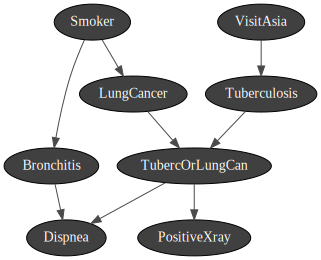

In [11]:
gnb.showBN(bn, size=100)

### Define the Conditional Probability Tables

Onde we have the structure of the network, we need to specify the conditional probability tables (CPTs). In Python, each CPT is referred to as a *Potential*.

There are several ways to fill these CPTs. In this workshop, we will show you some of them.

### Low Level Method

Filling the conditional probability table of the root node: VisitAsia

In [12]:
#Fill the conditional probability table of the variable 
#VisitAsia according to Figure 1: Pr(VisitAsia=present)  = 0.01
#                                 Pr(VisitAsia=absent) = 1 - 0.01 = 0.99
bn.cpt('VisitAsia').fillWith( [0.01, 1-0.01] )

(pyAgrum.Potential<double>@0x559585078320) 
  VisitAsia        |
present  |absent   |
---------|---------|
 0.0100  | 0.9900  |

Filling the conditional probability table of the root node: Smoker

In [13]:
# Fill the conditional probability table of the variable 
# Smoker according to Figure 1: Pr(Smoker=present)  = 0.5
#                               Pr(Smoker=absent) = 1 - 0.5 = 0.5
bn.cpt('Smoker').fillWith( [0.5, 1-0.5] )

(pyAgrum.Potential<double>@0x559584e7a970) 
  Smoker           |
present  |absent   |
---------|---------|
 0.5000  | 0.5000  |

The most convinient way to fill conditional probability tables is by using dictionaries in Python. This is done in the following way for variable TubercOrLungCan:

In [14]:
bn.cpt( 'TubercOrLungCan' )[ {'LungCancer': 'present',  'Tuberculosis': 'present'}  ] = [1, 0]
bn.cpt( 'TubercOrLungCan' )[ {'LungCancer': 'present',  'Tuberculosis': 'absent'} ] = [1, 0]
bn.cpt( 'TubercOrLungCan' )[ {'LungCancer': 'absent', 'Tuberculosis': 'present'}  ] = [1, 0]
bn.cpt( 'TubercOrLungCan' )[ {'LungCancer': 'absent', 'Tuberculosis': 'absent'} ] = [0, 1]

bn.cpt('TubercOrLungCan')


(pyAgrum.Potential<double>@0x559584ec8cb0) 
             ||  TubercOrLungCan  |
Tuberc|LungCa||present  |absent   |
------|------||---------|---------|
presen|presen|| 1.0000  | 0.0000  |
absent|presen|| 1.0000  | 0.0000  |
presen|absent|| 1.0000  | 0.0000  |
absent|absent|| 0.0000  | 1.0000  |

In [15]:
# specify the Tuberculosis conditional probability table
# your code goes here

bn.cpt( 'Tuberculosis' )[ {'VisitAsia': 'present'}  ] = [ 0.05, 1 - 0.05  ]
bn.cpt( 'Tuberculosis' )[ {'VisitAsia': 'absent'} ] = [ 0.01, 1 - 0.01 ]


In [16]:
# specify the LungCancer conditional probability table
bn.cpt( 'LungCancer' )[ {'Smoker': 'present'}  ] = [ 0.05, 1 - 0.05  ]
bn.cpt( 'LungCancer' )[ {'Smoker': 'absent'} ] = [ 0.01, 1 - 0.01 ]

# ---------------------
bn.cpt('LungCancer')


(pyAgrum.Potential<double>@0x559584f17ad0) 
      ||  LungCancer       |
Smoker||present  |absent   |
------||---------|---------|
presen|| 0.0500  | 0.9500  |
absent|| 0.0100  | 0.9900  |

In [17]:
#Bronchitis
bn.cpt( 'Bronchitis' )[ {'Smoker': 'present'}  ] = [ 0.6, 1 - 0.6  ]
bn.cpt( 'Bronchitis' )[ {'Smoker': 'absent'} ] = [ 0.3, 1 - 0.3 ]

bn.cpt('Bronchitis')

(pyAgrum.Potential<double>@0x5595850b3890) 
      ||  Bronchitis       |
Smoker||present  |absent   |
------||---------|---------|
presen|| 0.6000  | 0.4000  |
absent|| 0.3000  | 0.7000  |

In [18]:
bn.cpt( 'Dispnea' )[ {'Bronchitis': 'present',  'TubercOrLungCan': 'present'}  ] = [0.9, 1-0.9]
bn.cpt( 'Dispnea' )[ {'Bronchitis': 'present',  'TubercOrLungCan': 'absent'} ] = [1, 0]
bn.cpt( 'Dispnea' )[ {'Bronchitis': 'absent', 'TubercOrLungCan': 'present'}  ] = [0.7, 1-0.7]
bn.cpt( 'Dispnea' )[ {'Bronchitis': 'absent', 'TubercOrLungCan': 'absent'} ] = [0.8, 1-0.8]

bn.cpt('Dispnea')

(pyAgrum.Potential<double>@0x559584ee4040) 
             ||  Dispnea          |
Bronch|Tuberc||present  |absent   |
------|------||---------|---------|
presen|presen|| 0.9000  | 0.1000  |
absent|presen|| 0.7000  | 0.3000  |
presen|absent|| 1.0000  | 0.0000  |
absent|absent|| 0.8000  | 0.2000  |

In [19]:
# PositiveXray
bn.cpt( 'PositiveXray' )[ {'TubercOrLungCan': 'present'}  ] = [ 0.6, 1 - 0.6  ]
bn.cpt( 'PositiveXray' )[ {'TubercOrLungCan': 'absent'} ] = [ 0.3, 1 - 0.3 ]

bn.cpt('PositiveXray')

(pyAgrum.Potential<double>@0x559584f14ec0) 
      ||  PositiveXray     |
Tuberc||present  |absent   |
------||---------|---------|
presen|| 0.6000  | 0.4000  |
absent|| 0.3000  | 0.7000  |

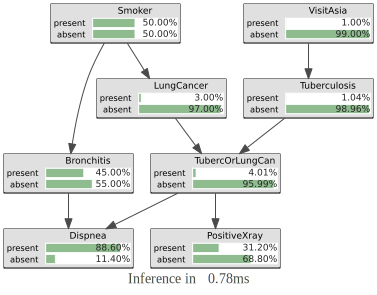

In [20]:
gnb.showInference( bn )

## Saving your Network

Well done! Your network is now complete! We can now save it in different formats. In this unit, we will use the format *.net* because it is the one that is widey used in the scientific community

In [21]:
import os

bn_graphs.saveBN( bn, os.path.join('data', 'Asia.net'))

To open the saved file:

In [22]:
bn_saved = bn_graphs.loadBN(os.path.join('data','Asia.net'))

In [23]:
bn_saved

(pyAgrum.BayesNet<double>@0x5595853daf90) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

## Inferences in Bayesian Networks

Probabilistic inference is the task of deriving the probability of one or more random variables taking a specific value or a specific set of values. For instance, we can use the Bayesian Network to *infer* the probability of the Lung Cancer being present given that a person Smokes:

$$Pr( LungCancer = present | Smokes = present ) =~?$$

To do this, we need to choose an algorithm to perform probabilistic inferences. There are two was to accomplish this in python:
- An exact method: **LazyPropagation**, which is usually applied for small networks
- An approximate method: **Gibbs**, which is usually applied for large networks.

In this unit, we will apply exact probabilistic methods, so we will use the **LazyPropagation** method. We can use it in the following way:

In [24]:
inference = bn_graphs.LazyPropagation(bn_saved)
print(inference)

<pyAgrum.pyAgrum.LazyPropagation; proxy of <Swig Object of type 'gum::LazyPropagation< double > *' at 0x7ff1869adf90> >


### Inference Without Evidence

Inferenceswithout evidence are inferences in which you do not know anything about your decision scenario. All you variables are *unknown*. In other words, they are **not observed**. These are inferences of the type: whart is the probability of a person having Dispnea?

$$Pr( Dispnea = true ) =~?$$

We do this in Python in the following way:

In [25]:
inference.makeInference()
inference.posterior('Dispnea')

(pyAgrum.Potential<double>@0x55958407c760) 
  Dispnea          |
present  |absent   |
---------|---------|
 0.8860  | 0.1140  |


If you want to access these values individually, in Python, you proceed like this:

In [26]:
# Pr( Dispnea = present)
pr_Dispnea = inference.posterior('Dispnea')[0]
print('Pr( Dispnea = prsent ) = ' + str(pr_Dispnea))

# You can round this number to 4 decimal places
print('Pr( Dispnea = present ) = ' + str(round(pr_Dispnea,4)))


Pr( Dispnea = prsent ) = 0.8859912008113546
Pr( Dispnea = present ) = 0.886


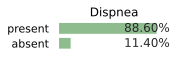

In [27]:
gnb.showProba(inference.posterior('Dispnea'))

### Inference with Eviddence

Bayesian Networks also allow us to make more complex questions (or queries) to the network. For instance, let's imagine that we know that a person resently visited Asia. What is now the probability of that person tuberculosis given this additional piece of information (i.e. this piece of evidence)?

$$Pr( Tuberculosis = present~|~VisitAsia = present ) =~?$$

In [28]:
# When we observe that an event occured, then we have a piece of evidence to give to our network.
# We can specify this by using the function setEvidence() and by specifying the observed variable and its state:
inference.setEvidence({'VisitAsia':'present'})

# Then, we just make the inference as presented before
inference.makeInference()
inference.posterior('VisitAsia')

(pyAgrum.Potential<double>@0x5595846d2ae0) 
  VisitAsia        |
present  |absent   |
---------|---------|
 1.0000  | 0.0000  |

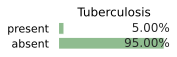

In [29]:
gnb.showProba(inference.posterior('Tuberculosis'))


### Visualizing All Inferences

Python also allows us to have a full visualizatin of the inferences of all variables

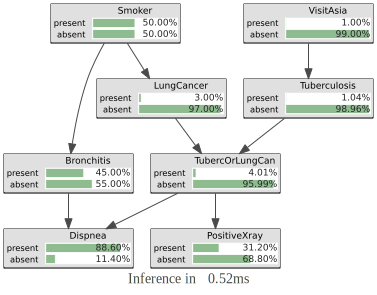

In [30]:
# Showing the full network when no variables are observed
gnb.showInference( bn_saved )


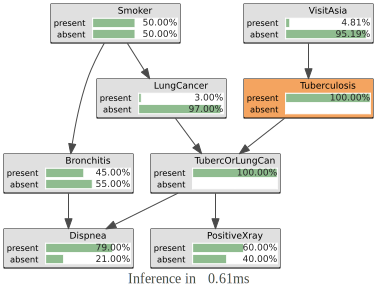

In [31]:
# Showing the full network when we observe that Tuberculosis is present
gnb.showInference( bn_saved, evs={'Tuberculosis':'present'} )



## Creating a Bayesian Network Using Existing Data - Back to the Breast Cancer Dataset

The conditional probability tables can be manually inderted into the Bayesian Network if we have this knowledge (which usually is acquired from experts and general statistics). However, most of the times, we have a dataset and we need to fill these conditional probability tables using that dataset. In this section, we will guide you on how to achieve this. Note that whether we manually fill these CPTs or if we learn them using existing data, the topology of the network must always be defined before hand!

In this part of the notebook, we will show how one could have used a Bayesian Network to model the Breast Cancer dataset presented in part 1

In [87]:
import pandas
import os
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC

In [88]:
# this is a very helpful function to discretise continous data
# Bayesian networks only support discrete values, they are not able to deal with continuous variables
# given that our dataset has continous variables, we need to discretise them
def discretize_dataframe( df, num_bins, class_var ):
    r=np.array(range(num_bins+1))/(1.0*num_bins)
  
    # quantiles are building using pandas.qcut
    # The "class" column is just copied.
    l=[]
    
    for col in df.columns.values:
        
        if col!=class_var:
            l.append( pd.DataFrame( pd.qcut( df[col],r, duplicates='drop',precision=2),columns=[col]).astype(str))
        else:
            l.append( pd.DataFrame( df[col].values,columns=[col]).astype(object))
    
    treated=pd.concat(l, join='outer', axis=1)
    return treated



First, we need to load our dataframe with the breast cancer data

In [89]:
filepath = "data/breast_data_bn.csv"
data = pd.read_csv(filepath)
data

,radius_mean,texture_mean,perimeter_mean,area_mean,diagnosis
0,17.99,10.38,122.80,1001.0,1
1,20.57,17.77,132.90,1326.0,1
2,19.69,21.25,130.00,1203.0,1
3,11.42,20.38,77.58,386.1,1
4,20.29,14.34,135.10,1297.0,1
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1
565,20.13,28.25,131.20,1261.0,1
566,16.60,28.08,108.30,858.1,1
567,20.60,29.33,140.10,1265.0,1


Our dataframe has continuous variables which need to discretized

In [90]:
num_bins = 5

data_discr = discretize_dataframe( data, num_bins, "diagnosis" )
data_discr

,radius_mean,texture_mean,perimeter_mean,area_mean,diagnosis
0,"(17.07, 28.11]","(9.700000000000001, 15.66]","(111.68, 188.5]","(915.06, 2501.0]",1
1,"(17.07, 28.11]","(15.66, 17.91]","(111.68, 188.5]","(915.06, 2501.0]",1
2,"(17.07, 28.11]","(19.97, 22.44]","(111.68, 188.5]","(915.06, 2501.0]",1
3,"(11.37, 12.73]","(19.97, 22.44]","(73.29, 81.94]","(143.49, 396.56]",1
4,"(17.07, 28.11]","(9.700000000000001, 15.66]","(111.68, 188.5]","(915.06, 2501.0]",1
...,...,...,...,...,...
564,"(17.07, 28.11]","(19.97, 22.44]","(111.68, 188.5]","(915.06, 2501.0]",1
565,"(17.07, 28.11]","(22.44, 39.28]","(111.68, 188.5]","(915.06, 2501.0]",1
566,"(14.06, 17.07]","(22.44, 39.28]","(91.42, 111.68]","(609.74, 915.06]",1
567,"(17.07, 28.11]","(22.44, 39.28]","(111.68, 188.5]","(915.06, 2501.0]",1


In [91]:
# save discretized dataframe to file:
#data_discr.astype(str)

file_discr = "data/discr_data.csv"
data_discr.to_csv(file_discr, index = False)



In [93]:
data_discr = pd.read_csv(file_discr, index_col = False)
#data_discr.drop("Unnamed: 0", axis=1, inplace=True)
data_discr

,radius_mean,texture_mean,perimeter_mean,area_mean,diagnosis
0,"(17.07, 28.11]","(9.700000000000001, 15.66]","(111.68, 188.5]","(915.06, 2501.0]",1
1,"(17.07, 28.11]","(15.66, 17.91]","(111.68, 188.5]","(915.06, 2501.0]",1
2,"(17.07, 28.11]","(19.97, 22.44]","(111.68, 188.5]","(915.06, 2501.0]",1
3,"(11.37, 12.73]","(19.97, 22.44]","(73.29, 81.94]","(143.49, 396.56]",1
4,"(17.07, 28.11]","(9.700000000000001, 15.66]","(111.68, 188.5]","(915.06, 2501.0]",1
...,...,...,...,...,...
564,"(17.07, 28.11]","(19.97, 22.44]","(111.68, 188.5]","(915.06, 2501.0]",1
565,"(17.07, 28.11]","(22.44, 39.28]","(111.68, 188.5]","(915.06, 2501.0]",1
566,"(14.06, 17.07]","(22.44, 39.28]","(91.42, 111.68]","(609.74, 915.06]",1
567,"(17.07, 28.11]","(22.44, 39.28]","(111.68, 188.5]","(915.06, 2501.0]",1


Learning a Bayesian network from a dataframe:

In [103]:
# call a BN learner
learner = gum.BNLearner( file_discr )
# specify the learning algorithm. For the purposes of this unit, one can use the Hill Climbing algorithm

# learn the data
#bn =  learner.useGreedyHillClimbing()
bn = learner.learnBN()
bn

(pyAgrum.BayesNet<double>@0x5595869a9500) BN{nodes: 5, arcs: 4, domainSize: 1250, dim: 75}

Let's ask some questions to the network by calling the inference engine

In [107]:
features = data_discr.columns

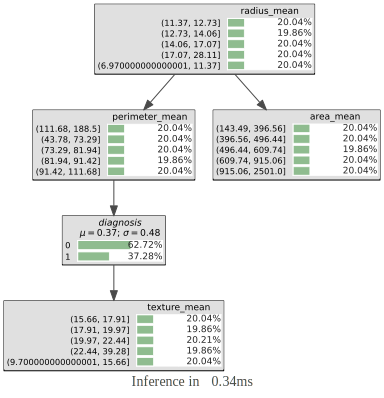

In [110]:
inference = bn_graphs.LazyPropagation(bn)
gnb.showInference( bn )

We can already see that the dataset is highly unlabanced in terms of the diagnosis code: there 62% of negative cases vs 37% of positive cases. Let's continue to ask questions to the network.

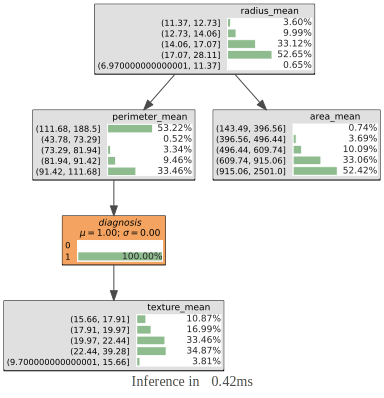

In [112]:
# what are the general characteristics of a person diagnosed with breast cancer?
gnb.showInference( bn, evs={'diagnosis':'1'} )

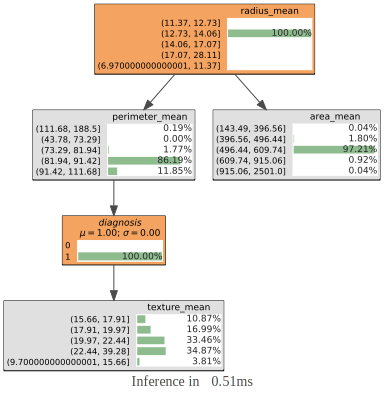

In [113]:
# what happens if you observe a positive diagnosis and a radius mean between "(12.73, 14.06]"?
# what happened to the texture_mean? Can you explain why?

gnb.showInference( bn, evs={'diagnosis':'1', 'radius_mean':'(12.73, 14.06]'} )

### Conclusion

We have demonstradted with different classification techniques using Bayesian Networks. In the first approach, we mangaged to model a classifier without using any training set and relying solely on prior knowledge. In the second approach we used only machine learning techniques. Finally, in the third example we assumed the naive bayes hypothesis and obtained a model combined